In [3]:
!pip install xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 145.2 kB/s eta 0:14:20
   ---------------------------------------- 0.0/124.9 MB 145.2 kB/s eta 0:14:20
   ---------------------------------------- 0.1/124.9 MB 204.8 kB/s eta 0:10:10
   ---------------------------------------- 0.1/124.9 MB 218.6 kB/s eta 0:09:31
   ---------------------------------------- 0.1/124.9 MB 218.6 kB/s eta 0:09:31
   ---------------------------------------- 0.1/124.9 MB 228.2 kB/s eta 0:09:07
   ---------------------------------------- 0.1/124.9 MB 228.2 kB/s eta 0:09:07
   ------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


In [7]:
# Replace 'Dentistry.csv' with the path to your dataset file
dataset = pd.read_csv('Dentistry Dataset.csv')


In [9]:
dataset = dataset.ffill()


In [10]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])


In [11]:
X = dataset.drop(['Gender', 'Sample ID', 'Sl No'], axis=1)
y = dataset['Gender']


In [12]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)


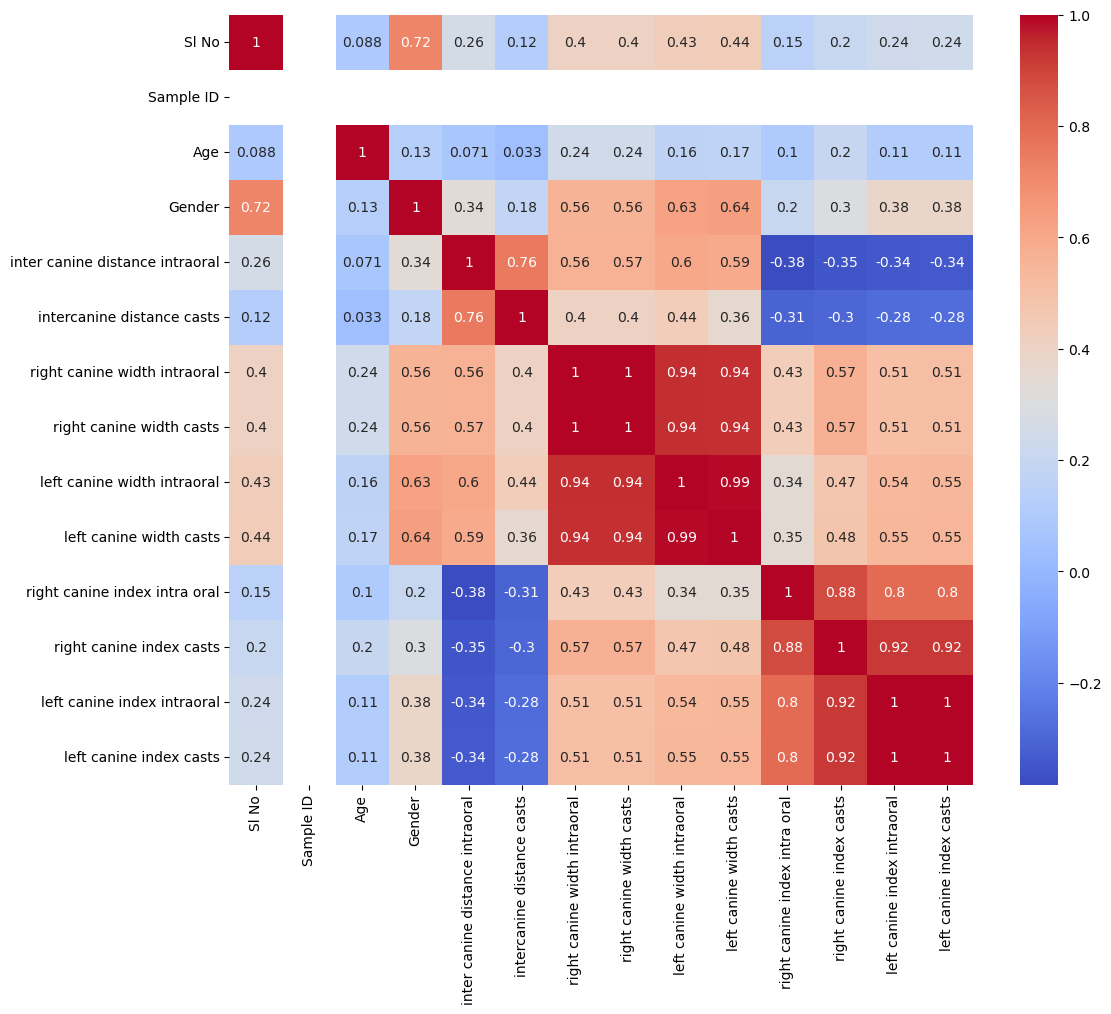

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()


In [16]:
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Evaluating Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       113
           1       0.63      0.75      0.68       107

    accuracy                           0.66       220
   macro avg       0.67      0.67      0.66       220
weighted avg       0.67      0.66      0.66       220



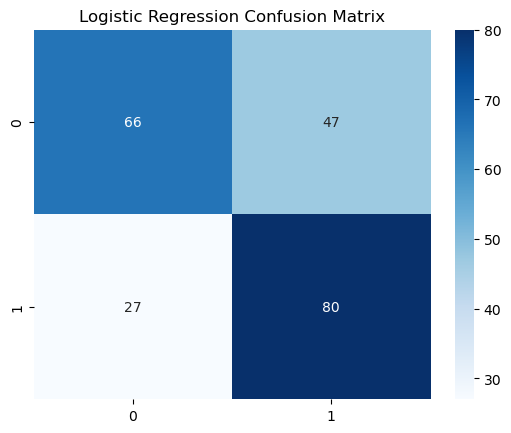

Evaluating Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       113
           1       0.84      0.91      0.87       107

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



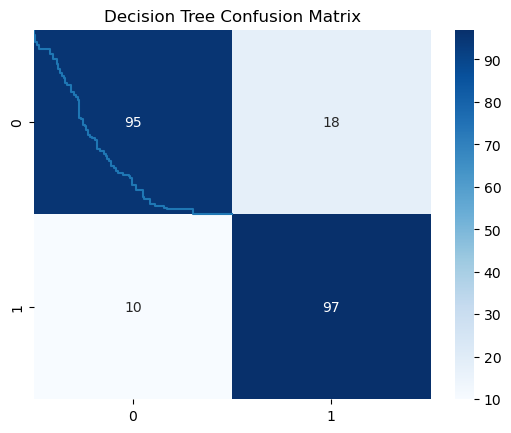

Evaluating Random Forest
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       113
           1       0.91      0.88      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



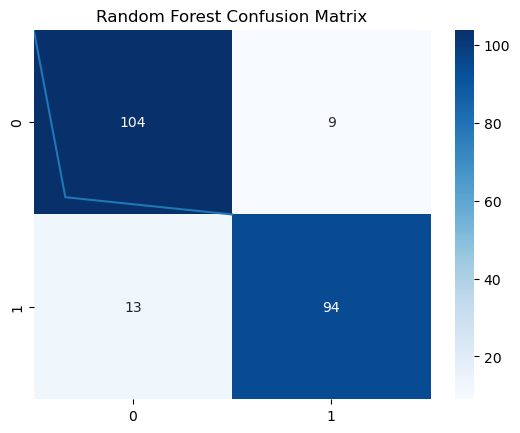

Evaluating XGBoost
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       113
           1       0.89      0.89      0.89       107

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



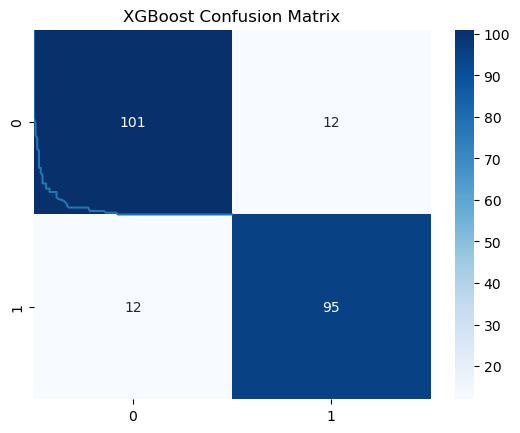

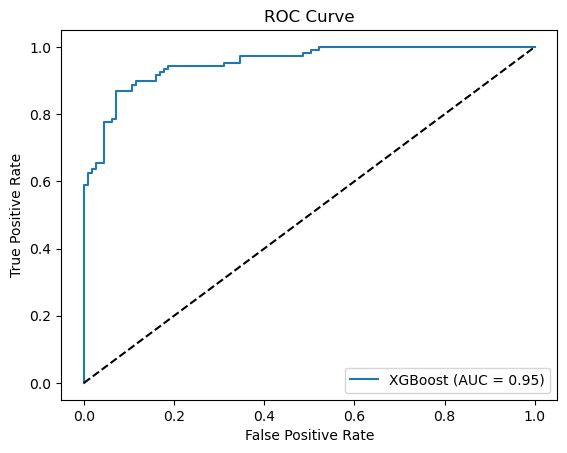

In [17]:
models = {'Logistic Regression': log_reg, 'Decision Tree': dt_clf, 'Random Forest': rf_clf, 'XGBoost': xgb_clf}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    # ROC and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
